In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv("C:\\Users\\Pavan.M\\Downloads\\archive (4)\\seattle-weather.csv")

In [5]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


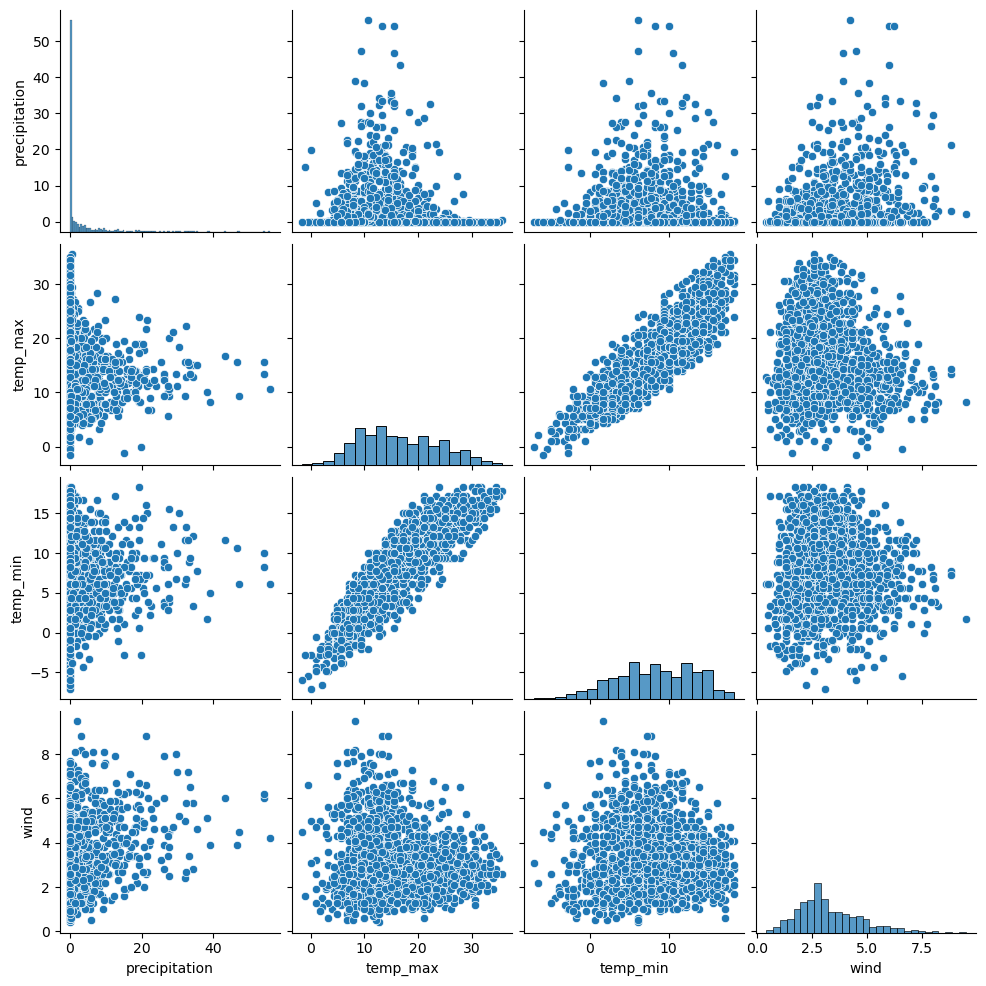

In [13]:
sns.pairplot(data)
plt.show()

In [7]:
numeric_data = data.drop(columns=['date'])

In [9]:
numeric_data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [10]:
label_encoder = LabelEncoder()
numeric_data['weather'] = label_encoder.fit_transform(numeric_data['weather'])

In [11]:
label_encoder

LabelEncoder()

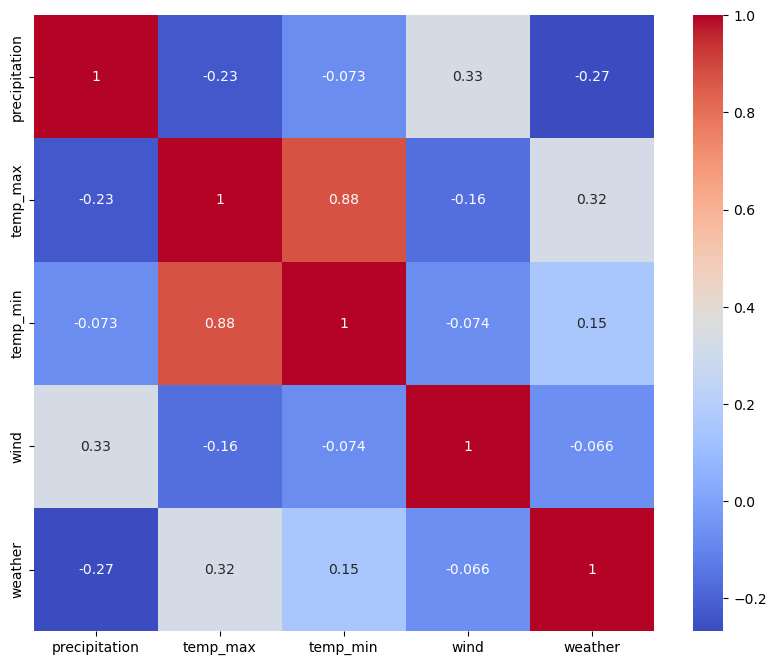

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [14]:
data = data.dropna()

In [15]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [16]:
data['weather'] = label_encoder.fit_transform(data['weather'])

In [17]:
X = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = data['weather']

In [19]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [20]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int32

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
scaler

StandardScaler()

In [23]:
X_scaled

array([[-0.45364986, -0.49529914, -0.64421175,  1.01497975],
       [ 1.17859791, -0.79473121, -1.08234662,  0.87583314],
       [-0.33385186, -0.64501518, -0.20607688, -0.65477956],
       ...,
       [-0.45364986, -1.25748987, -1.52048149, -0.44605965],
       [-0.45364986, -1.47525865, -1.83912504,  0.11052679],
       [-0.45364986, -1.47525865, -2.05819247,  0.18010009]])

In [24]:
n_lags = 3
X_seq, y_seq = [], []

for i in range(len(X_scaled) - n_lags):
    X_seq.append(X_scaled[i:i + n_lags])
    y_seq.append(y[i + n_lags])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [25]:
X_seq

array([[[-0.45364986, -0.49529914, -0.64421175,  1.01497975],
        [ 1.17859791, -0.79473121, -1.08234662,  0.87583314],
        [-0.33385186, -0.64501518, -0.20607688, -0.65477956]],

       [[ 1.17859791, -0.79473121, -1.08234662,  0.87583314],
        [-0.33385186, -0.64501518, -0.20607688, -0.65477956],
        [ 2.58622442, -0.57696243, -0.52472042,  1.01497975]],

       [[-0.33385186, -0.64501518, -0.20607688, -0.65477956],
        [ 2.58622442, -0.57696243, -0.52472042,  1.01497975],
        [-0.2589781 , -1.02611054, -1.08234662,  1.98900601]],

       ...,

       [[-0.45364986, -1.63858523, -1.63997282, -0.51563295],
        [ 0.83417865, -1.63858523, -1.30141406, -0.23733973],
        [-0.2290286 , -1.55692194, -1.30141406, -1.35051261]],

       [[ 0.83417865, -1.63858523, -1.30141406, -0.23733973],
        [-0.2290286 , -1.55692194, -1.30141406, -1.35051261],
        [-0.45364986, -1.25748987, -1.52048149, -0.44605965]],

       [[-0.2290286 , -1.55692194, -1.30141406,

In [26]:
y_seq

array([2, 2, 2, ..., 1, 4, 4])

In [27]:
X_seq_flat = X_seq.reshape(X_seq.shape[0], -1)

In [28]:
X_seq_flat

array([[-0.45364986, -0.49529914, -0.64421175, ..., -0.64501518,
        -0.20607688, -0.65477956],
       [ 1.17859791, -0.79473121, -1.08234662, ..., -0.57696243,
        -0.52472042,  1.01497975],
       [-0.33385186, -0.64501518, -0.20607688, ..., -1.02611054,
        -1.08234662,  1.98900601],
       ...,
       [-0.45364986, -1.63858523, -1.63997282, ..., -1.55692194,
        -1.30141406, -1.35051261],
       [ 0.83417865, -1.63858523, -1.30141406, ..., -1.25748987,
        -1.52048149, -0.44605965],
       [-0.2290286 , -1.55692194, -1.30141406, ..., -1.47525865,
        -1.83912504,  0.11052679]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_flat, y_seq, test_size=0.2, random_state=42)

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr_model.predict(X_test)

In [32]:
y_pred

array([2.62280338, 2.77392328, 2.90625169, 2.79962543, 2.39105308,
       2.85117971, 2.83403322, 2.07767231, 3.33777825, 3.01818941,
       2.92845599, 3.47830366, 2.61167834, 3.59301099, 2.57278324,
       2.25153972, 3.02127133, 2.60237401, 2.72803963, 1.71409531,
       2.43175378, 3.29390501, 3.35871146, 2.26493863, 2.83373339,
       2.52749072, 2.57597914, 3.86650992, 1.8043424 , 2.01985548,
       3.30513624, 2.88708857, 2.63563957, 2.42218967, 3.00945239,
       2.35225967, 2.65795827, 1.77423726, 2.2575497 , 3.15685766,
       2.86403355, 2.94579796, 2.18437712, 3.41664928, 2.80016669,
       1.84254386, 2.44099822, 2.69533015, 3.0287668 , 3.20036612,
       2.91728548, 3.85985938, 3.05576846, 2.94699429, 2.69007453,
       2.87830462, 2.79515938, 3.55877221, 2.29928398, 3.12649292,
       2.44226234, 2.17244746, 3.07173621, 3.1012589 , 3.13952512,
       2.81979868, 2.2720632 , 2.32460342, 2.74102534, 2.88659201,
       2.28570255, 3.1361777 , 2.1174882 , 2.79071601, 2.13762

In [33]:
y_pred_classes = np.round(y_pred).astype(int)

In [34]:
y_pred_classes

array([3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 2, 2, 3,
       3, 2, 3, 3, 3, 4, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3,
       3, 2, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 3, 2, 2, 3, 3, 3, 3,
       2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 4, 2, 2, 3, 4, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3,
       2, 3, 4, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3,
       3, 3, 3, 3, 4, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 2, 3, 4, 4,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 4,
       2, 2, 3, 2, 2, 3, 4, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3,
       3, 4, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3])

In [35]:
y_pred_classes = np.clip(y_pred_classes, 0, len(label_encoder.classes_) - 1)

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 1.2734771782372987
R-squared: 0.13151268456276366


In [38]:
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        10
         fog       0.00      0.00      0.00        25
        rain       0.63      0.53      0.57       121
        snow       0.01      0.67      0.02         3
         sun       0.94      0.11      0.20       133

    accuracy                           0.28       292
   macro avg       0.32      0.26      0.16       292
weighted avg       0.69      0.28      0.33       292



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


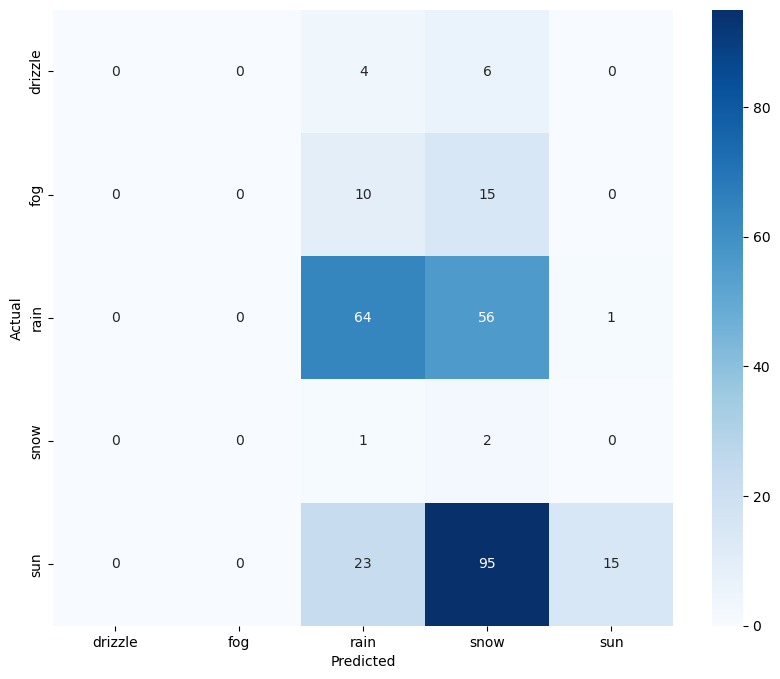

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

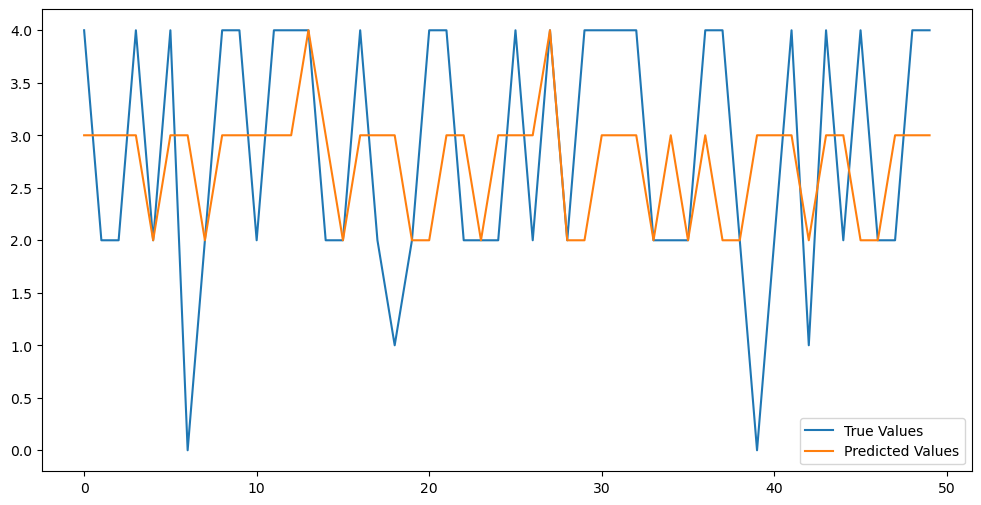

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:50], label='True Values')
plt.plot(y_pred_classes[:50], label='Predicted Values')
plt.legend()
plt.show()

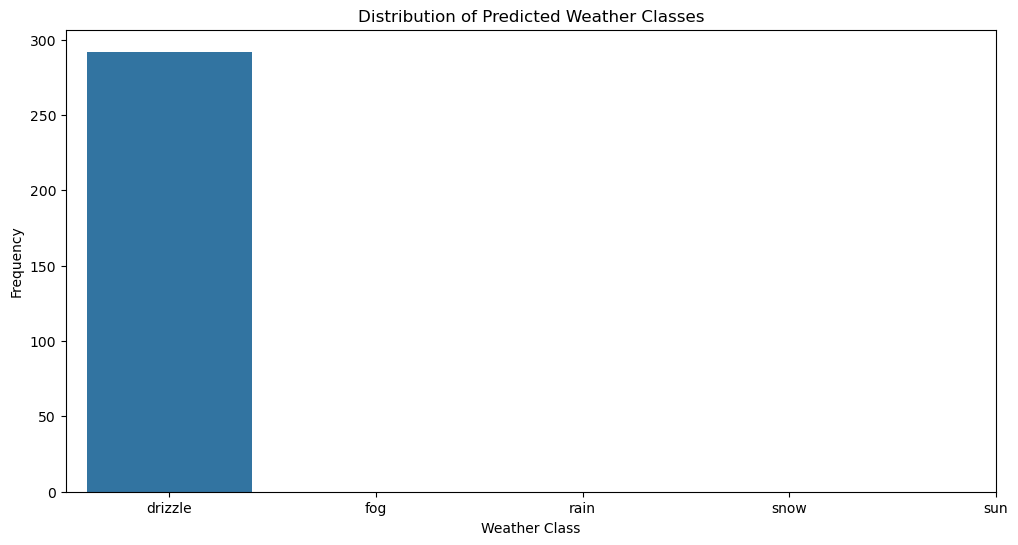

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(y_pred_classes)
plt.title('Distribution of Predicted Weather Classes')
plt.xlabel('Weather Class')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.show()

In [45]:
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_classes
})

In [46]:
predictions_df

,Actual,Predicted
0,4,3
1,2,3
2,2,3
3,4,3
4,2,2
...,...,...
287,4,3
288,1,3
289,2,2
290,4,3


In [48]:
print(predictions_df.head(10))

   Actual  Predicted
0       4          3
1       2          3
2       2          3
3       4          3
4       2          2
5       4          3
6       0          3
7       2          2
8       4          3
9       4          3
